## IS 2020 Algorytmy i programowanie

### Narysuj wykresy funkcji. Opisz osie. Dodaj tytuł.
* $y=\log_{10}(x+3)-4$, kolor lawendowy, linia ciągła
* $y=\sqrt{x-3}+2$, kolor śliwkowy, linia kropkowana
* $y=\sin^2 x$, Dla $ x \in [0, 2\pi]$, kolor czekoladowy, linia przerywana
* $y=2\sin x$, Dla $ x \in [0, 2\pi]$, kolor koralowy, linia kropka-kreska
* $y=\sin(x+2)$, Dla $ x \in [0, 2\pi]$, kolor limonkowy, punkty (bez linii)
* $y=\sin x+2$, Dla $ x \in [0, 2\pi]$, kolor karmazynowy, linia ciągła

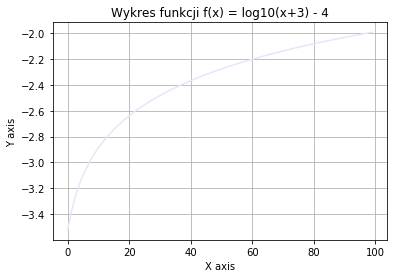

In [6]:
import matplotlib.pyplot as plt
import math

x = [el for el in range(0, 100)]
y = []
for el in x:
    try:
        y.append(math.log10(el+3) - 4)
    except:
        y.append(None)

plt.plot(x, y, color = 'lavender', linestyle = 'solid')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = log10(x+3) - 4")
plt.grid(True)
plt.show()

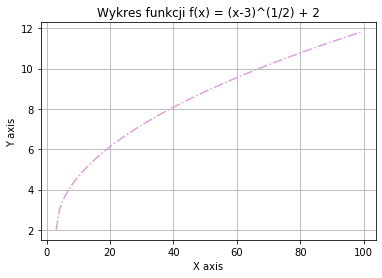

In [7]:
import matplotlib.pyplot as plt
import math

x = [el for el in range(0, 100)]
y = []
for el in x:
    try:
        y.append(math.sqrt(el-3) + 2)
    except:
        y.append(None)

plt.plot(x, y, color = 'plum', linestyle = 'dashdot')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = (x-3)^(1/2) + 2")
plt.grid(True)
plt.show()

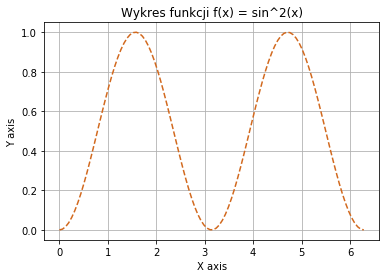

In [8]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = []
for el in x:
    try:
        y.append((math.sin(el))**2)
    except:
        y.append(None)

plt.plot(x, y, color = 'chocolate', linestyle = '--')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = sin^2(x)")
plt.grid(True)
plt.show()

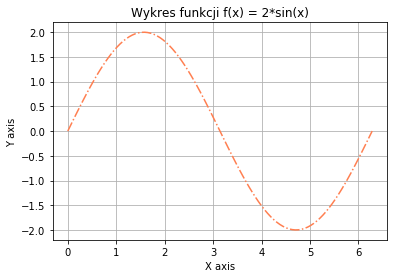

In [9]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = []
for el in x:
    try:
        y.append((math.sin(el))*2)
    except:
        y.append(None)

plt.plot(x, y, color = 'coral', linestyle = '-.')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = 2*sin(x)")
plt.grid(True)
plt.show()

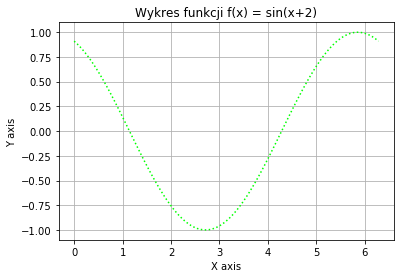

In [10]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = [] 
for el in x:
    try:
        y.append((math.sin(el+2)))
    except:
        y.append(None)

plt.plot(x, y, color = 'lime', linestyle = 'dotted')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = sin(x+2)")
plt.grid(True)
plt.show()

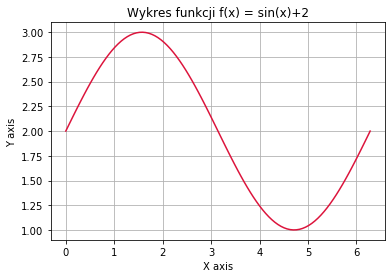

In [11]:
import matplotlib.pyplot as plt
import math
from numpy import linspace

x = linspace(0, 2*(math.pi), 100)
y = []
for el in x:
    try:
        y.append((math.sin(el))+2)
    except:
        y.append(None)

plt.plot(x, y, color = 'crimson', linestyle = 'solid')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title("Wykres funkcji f(x) = sin(x)+2")
plt.grid(True)
plt.show()

### Zadanie 2 [20 pkt]
Na podstawie dowolnych danych statystycznych (np wyników wyborów, ocen matur, sondaży) utwórz dwa słowniki - kluczami są nazwy, wartościami są uzyskane wyniki (10 pkt). Słowniki zapisz do plików (zapekluj, 10 pkt). Kod wstaw poniżej.

In [14]:
### program otwiera plik galapagos.txt który zawiera dane:
#
# Year
# Month
# Day
# Surface sea temperature minimum
# Surface sea temperature maximum 
# Surface sea temperature at 90th percentile
# Heat stress
# Degree heating week
# 
# przykladowa linia:
# YYYY MM DD SST_MIN SST_MAX SST@90th_HS SSTA@90th_HS 90th_HS>0 DHW_from_90th_HS>1 BAA_7day_max
# 1985 01 01 22.8200 25.0700 23.8300     -0.6774       0.0000    0.0000            0
# potrzebne dane:
# 1985 01 01 22.8200 25.0700
#
# tworzy słownik {rok : srednia temperatura maksymalna}
# tworzy słownik {rok : srednia temperatura minimalna}

import pickle

minTemp = {}
maxTemp = {}
with open('galapagos.txt', 'r') as galapagos_file:
    for line_index, line in enumerate(galapagos_file):
        if line_index < 22:
            continue
        if line_index == 13171:
            break
        line = line[:26].split(' ')
        try:
            minTemp[line[0]] += float(line[3])
            maxTemp[line[0]] += float(line[4])
        except KeyError:
            minTemp[line[0]] = float(line[3])
            maxTemp[line[0]] = float(line[4])

for year, Temp in minTemp.items():
    if int(year[2:]) % 4 == 0:
        minTemp[year] = Temp/366
    else:
        minTemp[year] = Temp/365
        
for year, Temp in maxTemp.items():
    if int(year[2:]) % 4 == 0:
        maxTemp[year] = Temp/366
    else:
        maxTemp[year] = Temp/365
        
#print(minTemp)
#print()
#print(maxTemp)

FileMinTemp = open('min_temp_galapagos_sea_surface', 'wb')
pickle.dump(minTemp, FileMinTemp)
FileMinTemp.close()

FileMaxTemp = open('max_temp_galapagos_sea_surface', 'wb')
pickle.dump(maxTemp, FileMaxTemp)
FileMaxTemp.close()

print('END')

END


%%bash
cat min_temp_galapagos_sea_surface
echo ''
echo ''
cat max_temp_galapagos_sea_surface

### Zadanie 3 [20 pkt]
Oba pliki (`*.p`), które otrzymałeś jako rezutat zdania 2, zczytaj do zmiennej (odpekluj, 2 * 5 pkt). Na podstawie danych (wartości) stwórz wykres danych: na osi `x` odłóż klucze a na `y` wartości (2 * 5 pkt).

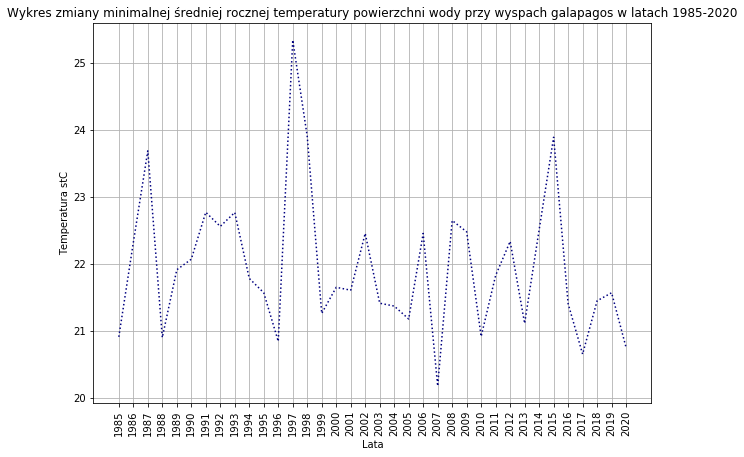

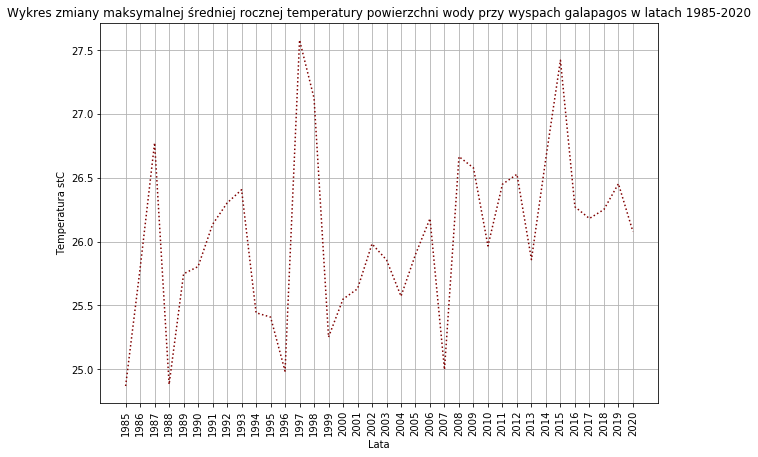

In [15]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()


plt.figure(figsize=(10, 7))
plt.plot([year for year in MinTemp.keys()], [temp for temp in MinTemp.values()], color = 'navy', linestyle = 'dotted')
plt.xticks([el for el in MinTemp.keys()], rotation=90)
plt.title("Wykres zmiany minimalnej średniej rocznej temperatury powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 7))
plt.plot([year for year in MaxTemp.keys()], [temp for temp in MaxTemp.values()], color = 'maroon', linestyle = 'dotted' )
plt.xticks([el for el in MinTemp.keys()], rotation=90)
plt.title("Wykres zmiany maksymalnej średniej rocznej temperatury powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

### Zadanie 4 [30 pkt] 
Wyszukaj w internecie informacje jak wykonać wykresy słupkowe, kołowe,
punktowe. Dla tych samych danych, które wybrałeś dla zadania 2, narysuj  takie wykresy (po 5 pkt za wykres).

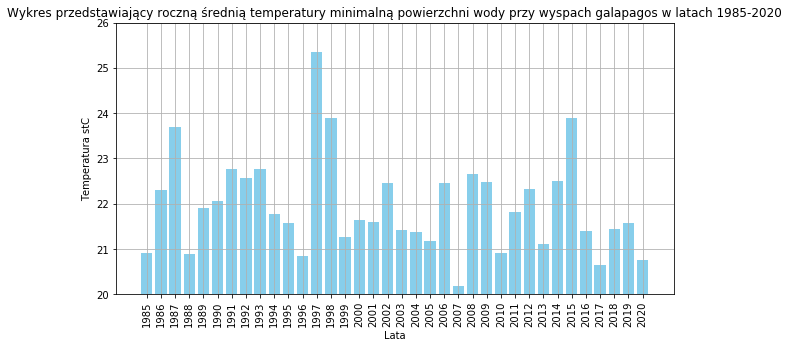

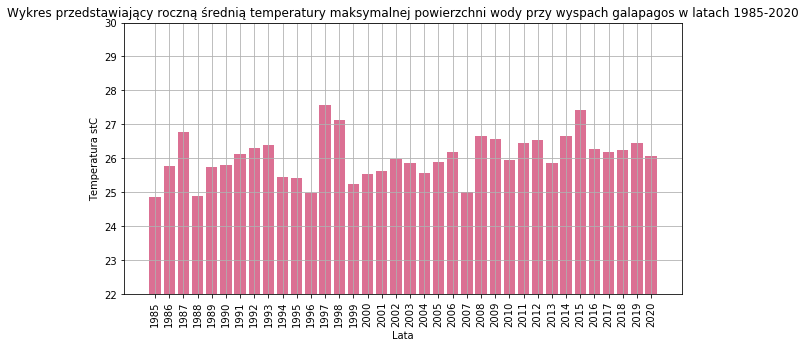

In [16]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()

year = [int(year) for year in MinTemp.keys()]
temp = [temp for temp in MinTemp.values()]
plt.figure(figsize=(10, 5))
plt.bar(year, temp, color = 'skyblue')
plt.ylim(ymax = 26, ymin = 20)
plt.xticks(year, rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury minimalną powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.ylim(ymax = 30, ymin = 22)
plt.bar([int(year) for year in MaxTemp.keys()], [temp for temp in MaxTemp.values()], color = 'palevioletred')
plt.xticks([int(year) for year in MaxTemp.keys()], rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury maksymalnej powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()

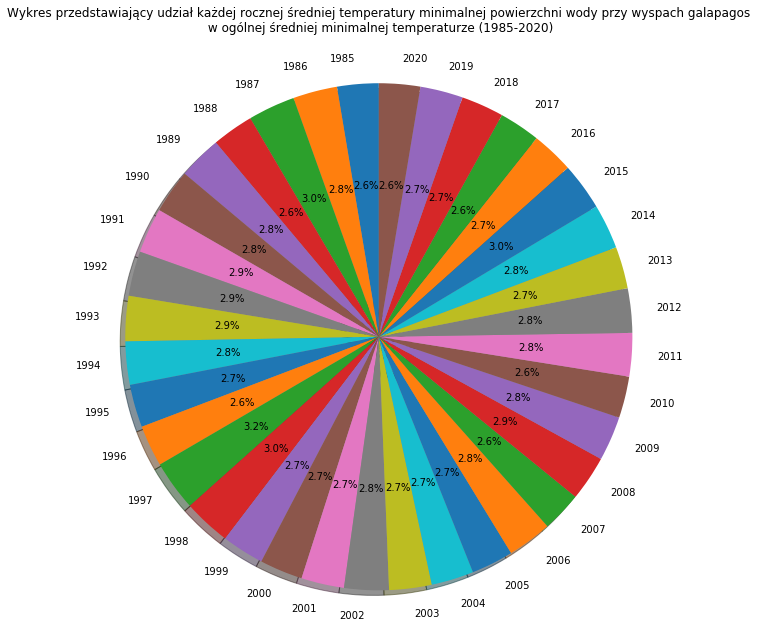

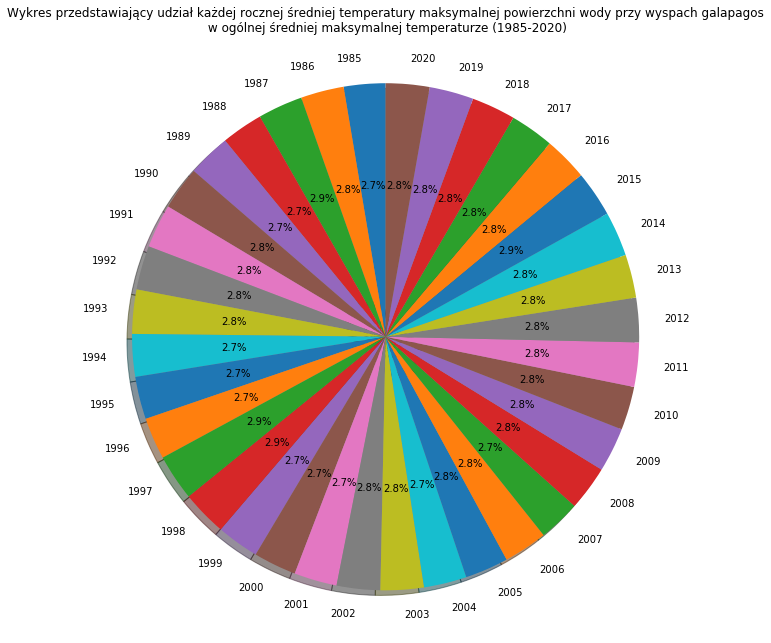

In [17]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()



year = [year for year in MinTemp.keys()]
temp = [temp for temp in MinTemp.values()]

plt.figure(figsize=(10, 11))
plt.pie(temp, labels=year, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.grid(True)
plt.title("Wykres przedstawiający udział każdej rocznej średniej temperatury minimalnej powierzchni wody przy wyspach galapagos\n w ogólnej średniej minimalnej temperaturze (1985-2020)")
plt.show()



year = [year for year in MaxTemp.keys()]
temp = [temp for temp in MaxTemp.values()]

plt.figure(figsize=(10, 11))
plt.pie(temp, labels=year, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.grid(True)
plt.title("Wykres przedstawiający udział każdej rocznej średniej temperatury maksymalnej powierzchni wody przy wyspach galapagos\n w ogólnej średniej maksymalnej temperaturze (1985-2020)")
plt.show()


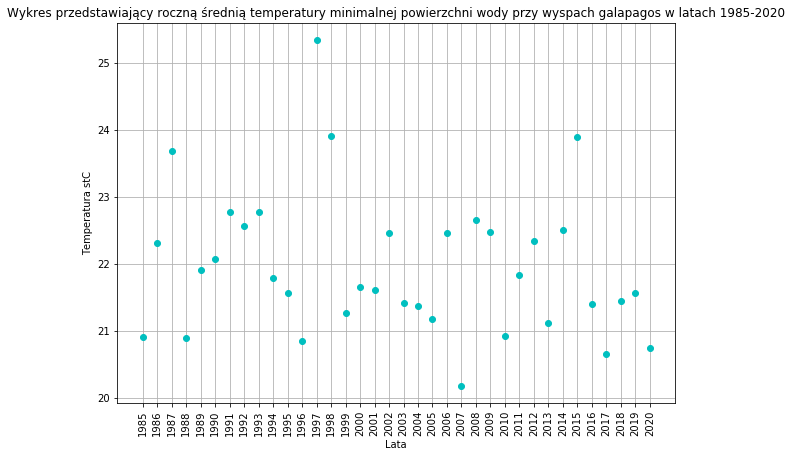

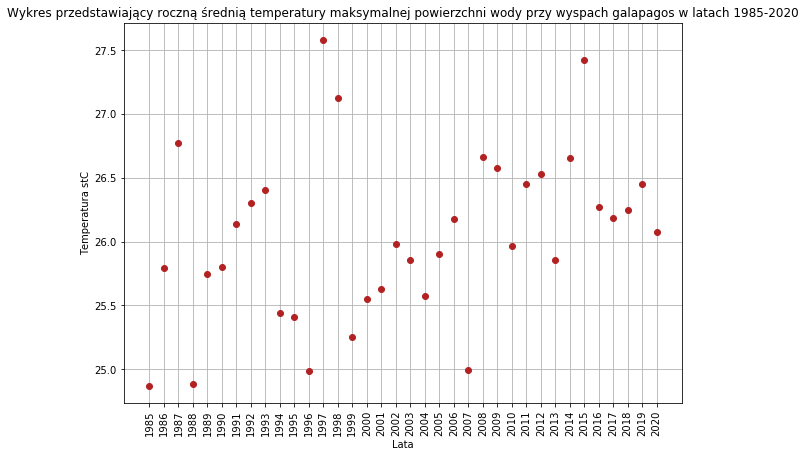

In [18]:
import pickle
import matplotlib.pyplot as plt

MinTempFile = open('min_temp_galapagos_sea_surface', 'rb')
MaxTempFile = open('max_temp_galapagos_sea_surface', 'rb')
MinTemp = pickle.load(MinTempFile)
MaxTemp = pickle.load(MaxTempFile)
MinTempFile.close()
MaxTempFile.close()

plt.figure(figsize=(10, 7))
plt.plot([int(year) for year in MinTemp.keys()], [temp for temp in MinTemp.values()], 'co')
plt.xticks([i for i in range(1985,2021)], rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury minimalnej powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 7))
plt.plot([int(year) for year in MaxTemp.keys()], [temp for temp in MaxTemp.values()], 'o', color = 'firebrick')
plt.xticks([i for i in range(1985,2021)], rotation=90)
plt.title("Wykres przedstawiający roczną średnią temperatury maksymalnej powierzchni wody przy wyspach galapagos w latach 1985-2020")
plt.xlabel('Lata')
plt.ylabel('Temperatura stC')
plt.grid(True)
plt.show()